In [1]:
#source for learning : setosa.io/ev/image-kernels/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset mnist
from tensorflow.keras.datasets import mnist

In [3]:
#mnist dataset is tuple, so separating shape like a tuple
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
#try to see 1 scale image
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

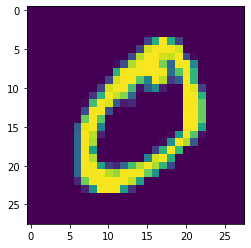

In [5]:
#try to see 1 image
plt.imshow(x_train[1])

In [6]:
#Scaling by devide with maximum value of color
x_train = x_train/255
x_test = x_test/255

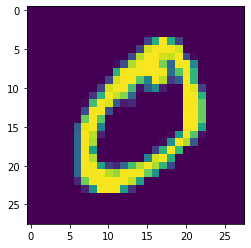

In [7]:
plt.imshow(x_train[1])

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
#Add 1 dimention for color channel -> number of image, width, height, color cahnnel
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#check actual x_train with y_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
#change y_train,y_test to category
from tensorflow.keras.utils import to_categorical

In [12]:
y_trainCat = to_categorical(y_train,num_classes=10)
y_testCat = to_categorical(y_test,num_classes=10)

In [13]:
y_trainCat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
#modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
#Object model
model = Sequential()

#Input layer and hiden layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#Output layer 
model.add(Dense(10,activation='softmax'))

#Complile model
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [16]:
#Define early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [18]:
#trianing model
model.fit(x=x_train,y=y_trainCat,epochs=10,
          callbacks=[early_stopping],validation_data=(x_test,y_testCat))

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1328 - accuracy: 0.9605 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0372 - val_accuracy: 0.9886


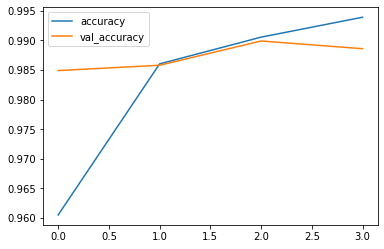

In [19]:
#show accuracy and loss for evaluation
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

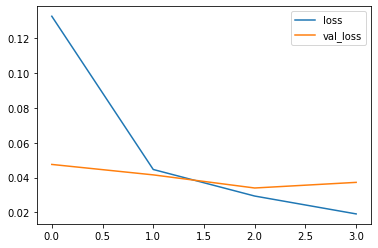

In [20]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [21]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
#check confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 976    0    0    0    0    0    3    0    0    1]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   0    2 1016    1    0    0    2    6    5    0]
 [   0    0    0  999    0    6    0    3    2    0]
 [   0    0    1    0  975    0    1    0    0    5]
 [   1    0    1    4    0  883    3    0    0    0]
 [   4    4    0    0    1    1  947    0    1    0]
 [   0    3    3    3    0    0    0 1015    3    1]
 [   4    2    3    0    0    0    4    2  954    5]
 [   1    2    0    6    7    3    1    1    1  987]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99 

In [24]:
#Try to predict actual image
try_num = x_test[100].reshape(28,28)

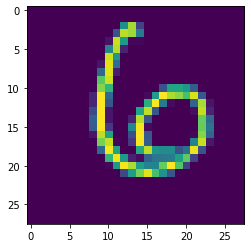

In [25]:
plt.imshow(try_num)

In [26]:
model.predict_classes(try_num.reshape(1,28,28,1))[0]

6